# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
data = pd.read_csv("assignment3_creditcard.csv")

In [8]:
#info,head,describe로 데이터 확인하고 전처리
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [9]:
data.info()
##Target변수인 Class는 범주형 변수로 분류되어야 함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [11]:
data["Class"] = pd.Series(data["Class"], dtype = "category")
features = data.iloc[:, :-1]
target = data.iloc[:, -1]
##V1~V28까지를 features,Class를 target으로 설정

In [23]:
data.describe()
##describe결과 분포가 고르지 않아 scale진행

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


Scale-로그변환을 제외한 방법으로 스케일링 할 때는 train데이터를 기준으로 해줘야 한다.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

s_features = pd.DataFrame(scaler.fit_transform(features), columns= features.columns)

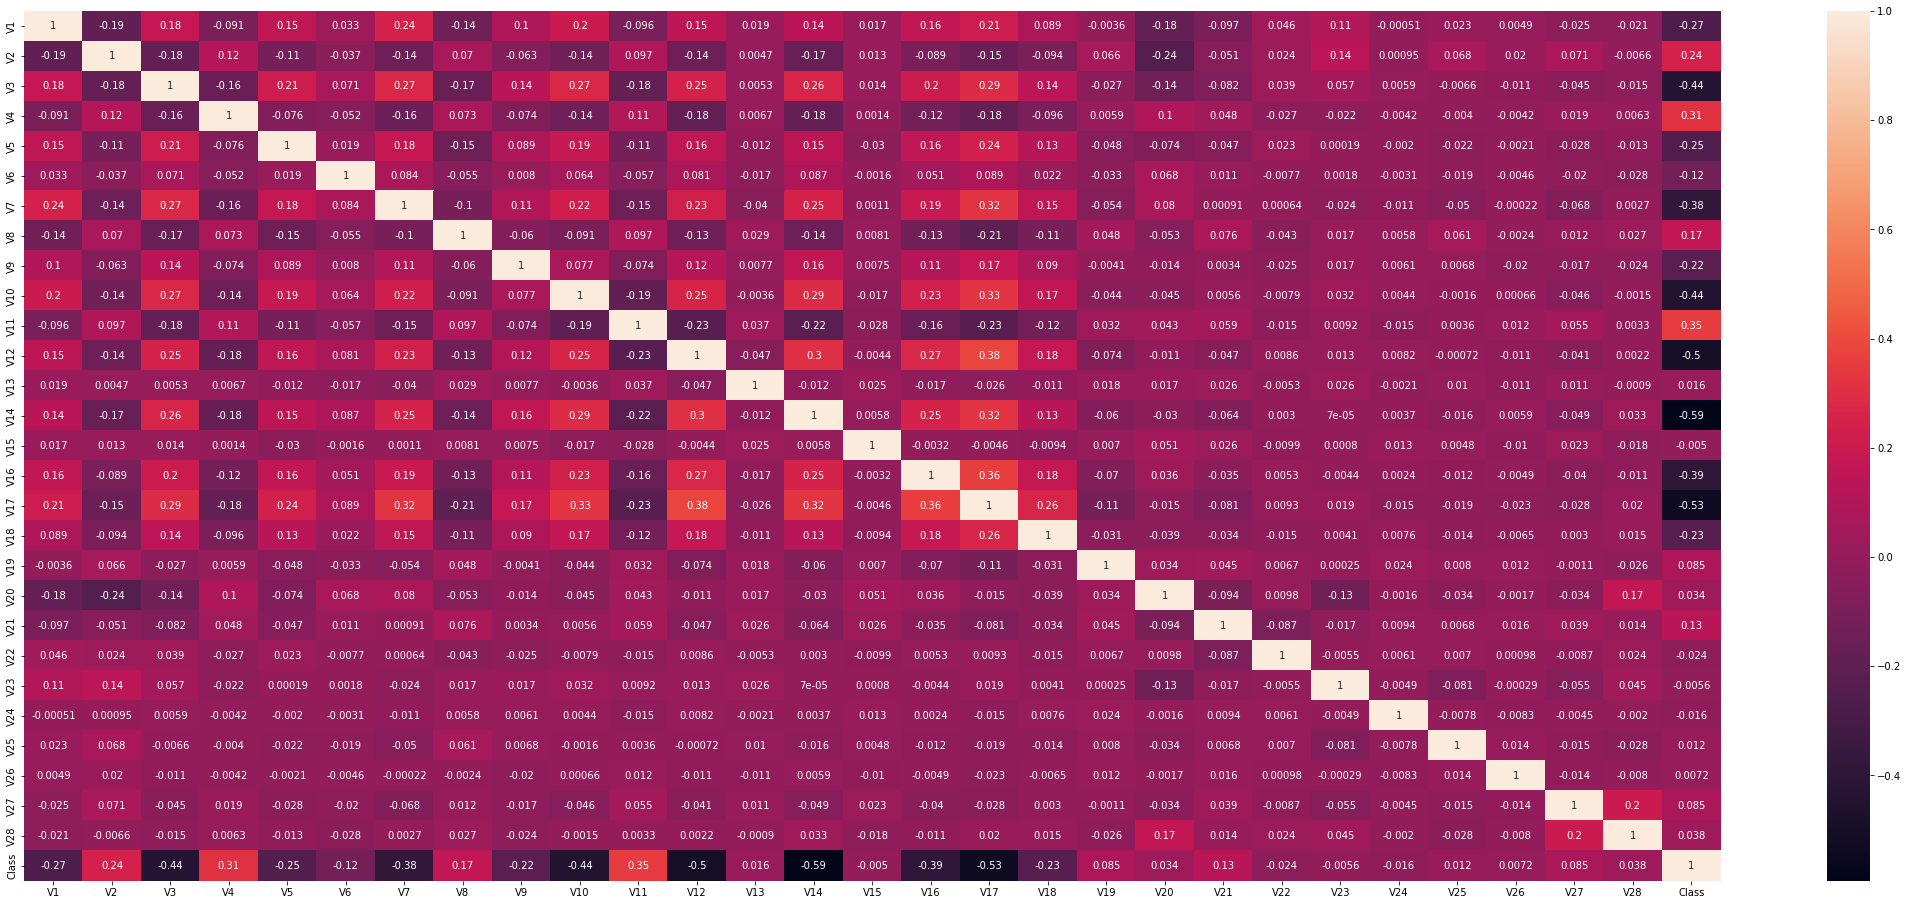

In [25]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

##Logistic Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import *

In [42]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(s_features, target, test_size=0.2, random_state = 11, stratify = target)

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
pred_proba = model.predict_proba(X_test)[:, -1].reshape(-1,1)
#후에 AUC-ROC계산에 사용하기 위해 각 클래스에 대한 확률을 구하기 위함.(불확실성 추정)

성능지표 개선 및 해석
- Sklearn ➔ mean accuracy, f1 score 등
- confusion matrix ➔ tp, fp, fn, tn 값

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

p = fn + tp
n = tn + fp

unbalanced한 데이터기에 accuracy는 지표로 적절하지 않음.
나머지 지표와 특히,불균형한 데이터를 다루기에 적합한 F1-score사용

In [51]:
#precision:Positive 로 예측한 데이터 중에 실제 positive 인 비율
precision = tp/ (tp + fp)
print("precision : ", precision)

precision :  0.9375


In [52]:
#recall:원래 positive 데이터에서 positive 로 분류된 수_성과가 낮음.
#실제 사기의 비율 조정으로 Trade-off 상쇄 가능?-undersampling,over sampling이용 가능
recall = (tp) / p
print("Recall : ", recall)

Recall :  0.6122448979591837


In [53]:
#F1 score:Recall과 Precision의 조화평균
f1_score(y_pred, y_test)

0.7407407407407408

In [56]:
#Specificity:negative로 판단한 내용 중에 실제 negative 인 비율

specificity =  tn / (tn + fp)
print("specificity : ", specificity)

specificity :  0.9996483207314929


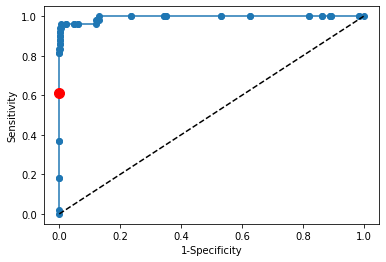

In [57]:
#ROC curve:모델의 임계값을 조정/그래프가 좌 상단에 위치할수록 좋은 모델

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [58]:
#AUC: ROC Curve 아래 면적(1에 가까울 수록 좋은 모델)
from sklearn.metrics import auc
print("auc : ", auc(fpr, tpr))

auc :  0.9942905947327058


##cut-off(threshold)

분류(Classification)를 위한 기준

로지스틱 함수로 구한 확률이 cutoff 이상이면 1, cutoff 이하이면 0으로 분류

Cutoff을 조정하여 성능 조절 가능

-최적의 cut-off 값은 보통 (sensitivity)-(1-specificity)=k 일 때, 가장 큰  값으로 정한다. 

In [59]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

optimal_pred = model.decision_function(X_test) > optimal_threshold

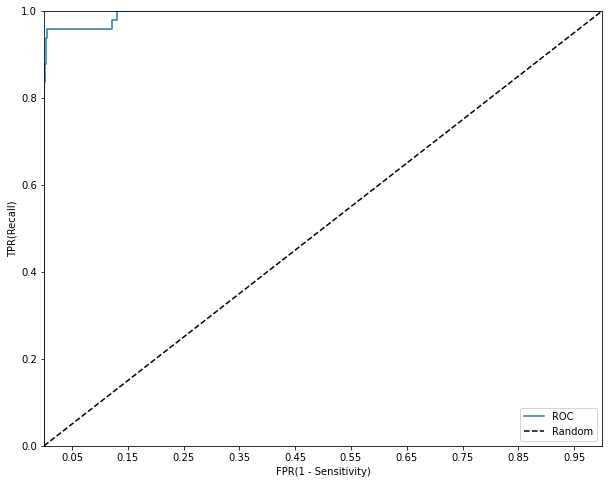

In [61]:

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_curve

# ROC curve and AUC Score를 그래프로 나타내기 위한 함수
def roc_curve_plot(y_test, pred_proba_c1):
    FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(10,8))
    # ROC 곡선을 그림
    plt.plot(FPRs, TPRs, label='ROC')
    # 가운데 대각선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, pred_proba)

In [63]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred_proba)
print(f'AUC Score : {auc:.5f}')
#99.429에서 상승

AUC Score : 0.99429


위의 재현율과 정밀도의 Trade-off관계
해당 데이터를 기준으로 생각해 볼 때,
사기 데이터(1)를 정상(0)이라고 판단하는 것이 카드사에 비교적 막대한 피해를 가져오기에 
이러한 경우엔 재현율을 우선시하여 결정하는 것이 맞다.
정밀도를 더 우선해야 하는 경우는 반대로 무죄인 사람(0)을 유죄(1)라고 판단했을 때의 경우이다.